In [1]:
# loading all required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tkinter as tk

from tkinter import ttk
from PIL import Image, ImageTk
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset = pd.read_csv("C://Users/16472/Downloads/dataset.csv")

In [3]:
dataset.head()

,ID,Inquiry,Category
0,1,How can I find affordable accommodation near t...,Accommodation
1,2,Are there any dormitories or hostels available...,Accommodation
2,3,Can I share accommodation with another student...,Accommodation
3,4,Are there any off-campus accommodations recomm...,Accommodation
4,5,What are the average rent costs in the vicinit...,Accommodation


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        158 non-null    int64 
 1   Inquiry   158 non-null    object
 2   Category  158 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.8+ KB


In [5]:
dataset.shape

(158, 3)

In [6]:
dataset.dtypes

ID           int64
Inquiry     object
Category    object
dtype: object

In [7]:
#Removing ID column
dataset = dataset.drop(columns=['ID'])

In [8]:
dataset.head()

,Inquiry,Category
0,How can I find affordable accommodation near t...,Accommodation
1,Are there any dormitories or hostels available...,Accommodation
2,Can I share accommodation with another student...,Accommodation
3,Are there any off-campus accommodations recomm...,Accommodation
4,What are the average rent costs in the vicinit...,Accommodation


In [9]:
cat_cols = [col for col in dataset.columns if dataset[col].dtypes == "O"]
print(cat_cols)

['Inquiry', 'Category']


In [10]:
def count_categories_in_columns(df,cols_to_count):
    for col in cols_to_count:
        cat_categories = dataset[col].value_counts().count()
        print(f"Column '{col}' has {cat_categories} categories.")

count_categories_in_columns(dataset, cat_cols)

Column 'Inquiry' has 158 categories.
Column 'Category' has 8 categories.


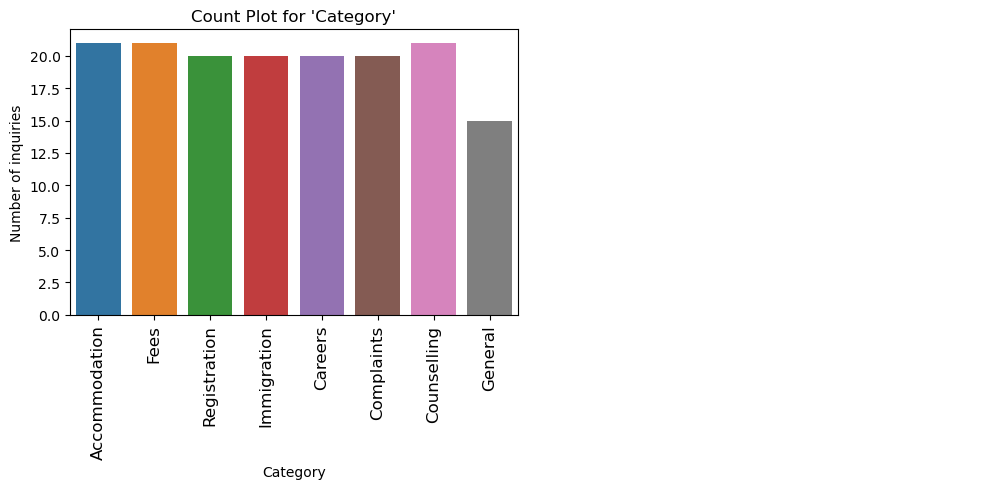

In [11]:
def plot_categorical_variables(dataframe, columns, y_axis_label=None):

    # Identify categorical variables
    categorical_cols = columns

    # Set the number of rows and columns for the subplot grid
    num_rows = (len(categorical_cols) // 2) + (len(categorical_cols) % 2)
    num_cols = 2

    # Create the subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Iterate through each categorical column and create plots
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=col, data=dataframe, ax=axes[i])
        axes[i].set_title(f"Count Plot for '{col}'")
        axes[i].tick_params(axis='x', rotation=90, labelsize=12)

        # Set custom y-axis label if provided
        if y_axis_label:
            axes[i].set_ylabel(y_axis_label)

    # Hide any empty subplots
    for i in range(len(categorical_cols), len(axes)):
        axes[i].axis('off')

    # Adjust the layout to prevent overlapping titles
    plt.tight_layout()

    # Show the plot
    plt.show()

cat_col = ['Category']
plot_categorical_variables(dataset,cat_col, y_axis_label="Number of inquiries")

In [12]:
#Split data into features (X) and labels (y)
X = dataset['Inquiry']
y = dataset['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
# Convert text to numerical features using CountVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [14]:
y_train

141      Counselling
11     Accommodation
79       Immigration
68       Immigration
123      Counselling
           ...      
71       Immigration
106       Complaints
14     Accommodation
92           Careers
102       Complaints
Name: Category, Length: 110, dtype: object

In [15]:
#deploying support vector machine
clf = LinearSVC()
clf.fit(X_train_vectorized, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [16]:
# Make predictions on the test set
predictions = clf.predict(X_test_vectorized)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

Accommodation       0.62      1.00      0.77         5
      Careers       0.83      0.83      0.83         6
   Complaints       1.00      1.00      1.00         2
  Counselling       0.80      0.80      0.80        10
         Fees       1.00      0.71      0.83         7
      General       1.00      0.50      0.67         6
  Immigration       0.88      1.00      0.93         7
 Registration       0.83      1.00      0.91         5

     accuracy                           0.83        48
    macro avg       0.87      0.86      0.84        48
 weighted avg       0.86      0.83      0.83        48



In [17]:
#Function to classify a user-provided question
def classify_question(user_question):
    #Transform the user's question using the TF-IDF vectorizer
    user_question_vectorized = vectorizer.transform([user_question])

    #Predict the category for the user's question
    predicted_category = clf.predict(user_question_vectorized)[0]

    return predicted_category


In [18]:

class CategoryAssignmentGUI:
    def __init__(self):
        self.categories = ['Accommodation', 'Fees', 'Registration', 'Immigration', 'Careers',
                           'Complaints', 'Counselling', 'General']

        self.category_email_mapping = []

        self.root = tk.Tk()
        self.root.title("Category Assignment GUI")
        self.root.geometry("600x400")  # Adjusted window size

        # Load and set the background image using Pillow
        img = Image.open("C://Users/16472/Downloads/igs.jpg")  # Change "background_image.jpg" to your image file
        img = img.resize((600, 400), Image.ANTIALIAS)  # Resize the image to fit the window
        self.background_image = ImageTk.PhotoImage(img)
        self.background_label = tk.Label(self.root, image=self.background_image)
        self.background_label.place(relwidth=1, relheight=1)

        # Heading
        self.heading_label = ttk.Label(self.root, text="VERTIPATH TECHNOLOGIES", font=('Helvetica', 16, 'bold'))
        self.heading_label.pack(pady=10)

        # Organization Name
        self.org_label = ttk.Label(self.root, text="HUMBER INTERNATIONAL GRADUATE SCHOOL", font=('Helvetica', 14, 'italic'))
        self.org_label.pack(pady=10)

        self.label = ttk.Label(self.root, text="Enter your question:")
        self.label.pack(pady=5)

        self.entry = ttk.Entry(self.root, width=90)
        self.entry.pack(pady=5)

        self.button = ttk.Button(self.root, text="Submit", command=self.process_question)
        self.button.pack(pady=10)

        self.clear_button = ttk.Button(self.root, text="Clear", command=self.clear_fields)
        self.clear_button.pack(pady=5)

        self.exit_button = ttk.Button(self.root, text="Exit", command=self.root.destroy)
        self.exit_button.pack(pady=10)

        self.result_label = ttk.Label(self.root, text="")
        self.result_label.pack(pady=10)

    def process_question(self):
        user_input = self.entry.get()
        if user_input.lower() == 'exit':
            self.root.destroy()
            return
        try:
            predicted_category = classify_question(user_input)
            email = f"{predicted_category.lower()}@email.com"
            self.category_email_mapping.append((predicted_category, email))
            result_text = f"Predicted Category: {predicted_category}\nAssigned Email: {email}"

            # Display the mapping
            #result_text += "\n\nCategory-Email Mapping:"
            #for category, email in self.category_email_mapping:
                #result_text += f"\nCategory: {category} -> Email: {email}"

            self.result_label.config(text=result_text)
        except ValueError as e:
            self.result_label.config(text=f"Error: {e}")

    def clear_fields(self):
        # Clear the entry field and result label
        self.entry.delete(0, tk.END)
        self.result_label.config(text="")

    def run(self):
        self.root.mainloop()

# Replace this function with your actual classifier function
def classify_question(user_question):
    #Transform the user's question using the TF-IDF vectorizer
    user_question_vectorized = vectorizer.transform([user_question])

    #Predict the category for the user's question
    predicted_category = clf.predict(user_question_vectorized)[0]

    return predicted_category

# Create an instance of the GUI and run it
gui = CategoryAssignmentGUI()
gui.run()

C:\Users\16472\AppData\Local\Temp\ipykernel_17684\950595252.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((600, 400), Image.ANTIALIAS)  # Resize the image to fit the window


# Previous models used with their accuracy score--->>>

In [16]:
# Initialize and train the MultinomialNB classifier
clf = MultinomialNB()
clf.fit(X_train_vectorized, y_train)

MultinomialNB()

In [17]:
# Make predictions on the test set
predictions = clf.predict(X_test_vectorized)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Print classification report
#print("Classification Report:")
#print(classification_report(y_test, predictions))

Accuracy: 0.6458333333333334


In [18]:
from sklearn.ensemble import RandomForestClassifier
#using randomforest classifier for better accuracy
clf = RandomForestClassifier(n_estimators=100, random_state=42)
#Increasing the number of trees (n_estimators) generally improves the model's performance.
clf.fit(X_train_vectorized, y_train)


RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the test set
predictions = clf.predict(X_test_vectorized)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8125


# email assign 

In [20]:
categories = ['Accommodation', 'Fees', 'Registration', 'Immigration', 'Careers',
       'Complaints', 'Counselling', 'General']

# Initialize an empty dictionary to store category-email mapping
category_email_mapping = {}

# Interactive loop for user input
while True:
    user_input = input("Enter your question (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    try:
        # Assuming classify_question is a function that predicts the category
        predicted_category = classify_question(user_input)
        print(f"Predicted Category: {predicted_category}")
        
        # Assign an email based on the predicted category
        email = f"{predicted_category.lower()}@email.com"
        category_email_mapping[predicted_category] = email

        print(f"Assigned Email: {email}")
        for category, email in category_email_mapping.items():
            print(f"Category: {category} -> Email: {email}")

    except ValueError as e:
        print(f"Error: {e}")



Enter your question (or 'exit' to quit): exit


# email  assign with GUI simple

In [21]:
import tkinter as tk
from tkinter import ttk

class CategoryAssignmentGUI:
    def __init__(self):
        self.categories = ['Accommodation', 'Fees', 'Registration', 'Immigration', 'Careers',
                           'Complaints', 'Counselling', 'General']

        self.category_email_mapping = []
        
        self.root = tk.Tk()
        self.root.title("Category Assignment GUI")
        self.root.geometry("600x400")  # Adjusted window size

        # Heading
        self.heading_label = ttk.Label(self.root, text="VERTIPATH TECHNOLOGIES", font=('Helvetica', 16, 'bold'))
        self.heading_label.pack(pady=10)

        # Organization Name
        self.org_label = ttk.Label(self.root, text="HUMBER ADVANCED LEARNING", font=('Helvetica', 14, 'italic'))
        self.org_label.pack(pady=10)

        self.label = ttk.Label(self.root, text="Enter your question:")
        self.label.pack(pady=5)

        self.entry = ttk.Entry(self.root, width=50)
        self.entry.pack(pady=5)

        self.button = ttk.Button(self.root, text="Submit", command=self.process_question)
        self.button.pack(pady=10)

        self.clear_button = ttk.Button(self.root, text="Clear", command=self.clear_fields)
        self.clear_button.pack(pady=5)

        self.exit_button = ttk.Button(self.root, text="Exit", command=self.root.destroy)
        self.exit_button.pack(pady=10)

        self.result_label = ttk.Label(self.root, text="")
        self.result_label.pack(pady=10)

    def process_question(self):
        user_input = self.entry.get()
        if user_input.lower() == 'exit':
            self.root.destroy()
            return
        try:
            predicted_category = classify_question(user_input)
            email = f"{predicted_category.lower()}@email.com"
            self.category_email_mapping.append((predicted_category, email))
            result_text = f"Predicted Category: {predicted_category}\nAssigned Email: {email}"

            # Display the mapping
            result_text += "\n\nCategory-Email Mapping:"
            for category, email in self.category_email_mapping:
                result_text += f"\nCategory: {category} -> Email: {email}"

            self.result_label.config(text=result_text)
        except ValueError as e:
            self.result_label.config(text=f"Error: {e}")

    def clear_fields(self):
        # Clear the entry field and result label
        self.entry.delete(0, tk.END)
        self.result_label.config(text="")

    def run(self):
        self.root.mainloop()

# Replace this function with your actual classifier function
def classify_question(user_question):
    #Transform the user's question using the TF-IDF vectorizer
    user_question_vectorized = vectorizer.transform([user_question])

    #Predict the category for the user's question
    predicted_category = clf.predict(user_question_vectorized)[0]

    return predicted_category

# Create an instance of the GUI and run it
gui = CategoryAssignmentGUI()
gui.run()
